# Week 2 Assigment: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


## I. Random Forest Classifier
**Hint**: Find solution of lab 4, ML101 :D

In [18]:
# Import libraries: pandas, numpy, matplotlib
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Import dataset
# Your one line of code here
data = pd.read_csv('./data/train.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

In [27]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest
# Your code here
X=data.drop(['label'],axis=1).values
y=data['label']

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [30]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#### Now let's convert some example of our data back to image

In [31]:
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])

# Your code here
index = 36
print("Label: " + str(y_train[index]))

Label: 3


In [22]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train[index]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

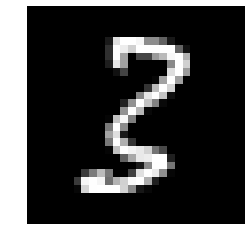

In [35]:
plt.imshow(X_train[50].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

In [36]:
y_train[index]

3

In [37]:
# Random Forest
# Let's define two classifier called rfc represent RandomForestClassifier
# Your code here
rfc=RandomForestClassifier()

In [38]:
# Let's fit training data to Random Forest Classifier
# Your code here
rfc=rfc.fit(X_train,y_train)

In [40]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here
from sklearn.metrics import accuracy_score
prediction_rfc=rfc.predict(X_test)
accuracy_score(y_test,prediction_rfc)

0.936031746031746

In [49]:
from sklearn.metrics import confusion_matrix
rfc_matrix=confusion_matrix(y_test,prediction_rfc)
rfc_matrix

array([[1199,    0,    6,    1,    2,    6,    2,    2,    4,    0],
       [   0, 1364,    9,    0,    3,    2,    3,    4,    3,    1],
       [   8,    5, 1185,   18,    3,    3,    7,   17,   14,    2],
       [   9,    5,   42, 1192,    2,   24,    0,   15,   20,    8],
       [   2,    4,    5,    2, 1106,    2,    8,    4,    4,   44],
       [  11,    5,    4,   30,    3,  990,   13,    1,   15,    9],
       [  13,    3,    5,    2,    7,   19, 1210,    0,    7,    0],
       [   2,    8,   25,    2,   13,    3,    1, 1282,    5,   27],
       [   5,    8,   27,   34,   11,   14,    9,    2, 1154,   18],
       [   3,   10,    7,   17,   34,   10,    1,   25,   13, 1112]],
      dtype=int64)

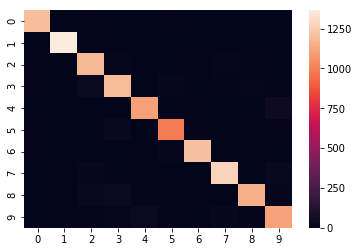

In [50]:
sns.heatmap(rfc_matrix)

#### We have just create a Random forest model and calculating accuracy. But not testing it

## II. SVM + Feature extraction HOG

### 1. Create dataset

In [51]:
# Import feature package from skimage
# we will use feature package to extract hog features from images
from skimage import feature

In [55]:
# Util function to extract_features
# Input image: 2D image (28 x 28)
image='./test_images/eight.jpeg'
# Output: HOG vector of input image
def extract_features(image):
    hog_vec = feature.hog(image,visualise=True)
    return hog_vec

In [64]:
feature.hog(image, visualize=True)

C:\Users\Quan\Anaconda3_2\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U24') dtype('<U24') dtype('<U24')

TypeError: Image data cannot be converted to float

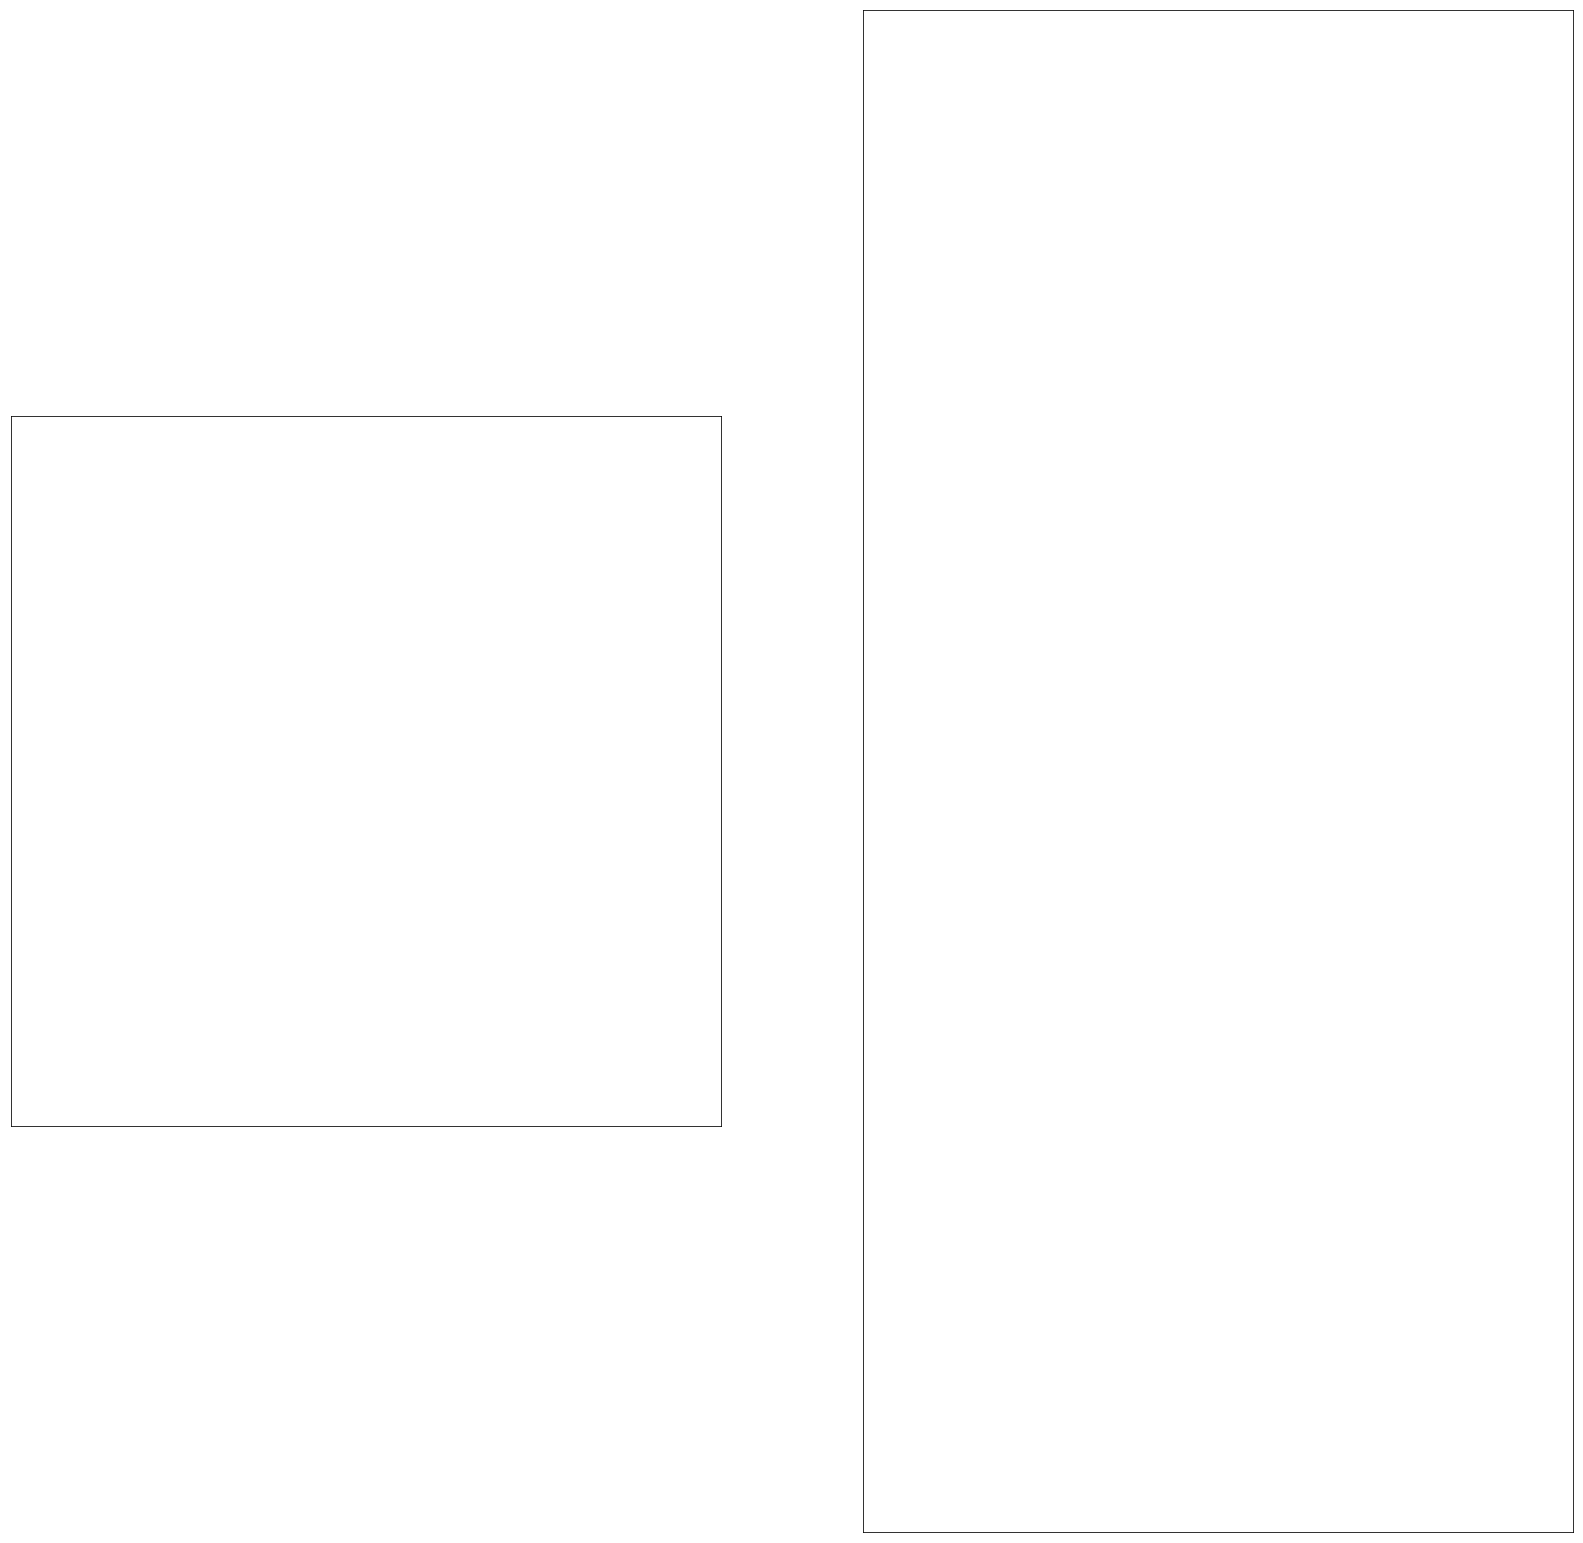

In [67]:
# Plot image along with HOG features
# Your code here
fig, ax = plt.subplots(1, 2, figsize=(28, 28),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

In [57]:
# Define features X
# Input of feature.hog() is a 2 dimension image but image in train.csv is just 1 dimension (a row).
# So we need to get **values** of each image and **reshape** to 28 x 28
mnist = data.drop(columns = ['label']).values

In [58]:
# Convert 1D image to 2D
mnist_2D = mnist.reshape((data.shape[0], 28, 28))

In [59]:
# For each image, we get HOG features and save in X
# X is our features to train the model
X = feature.hog(image,visualise=True)

C:\Users\Quan\Anaconda3_2\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U24') dtype('<U24') dtype('<U24')

In [115]:
# Define target y to predict
# Hint: label
y = # Your code here

Now, We have data and are ready to train the model

### 2. Modeling and Evaluation

In [ ]:
# We will use LinearSVC, GaussianNB
# GaussianNB for baseline
# and fine tune LinearSVC to archive high accuracy
# Let's import those libraries first
# Your code here

In [137]:
# For fast evaluate model, we use cross_val_score.
# To use this package, we have to import it first
# Your code here


In [124]:
# Create GaussianNB model
gauNB = # Your code here

# calculate score using cross_val_score
score = # Your code here
print(score)

/home/dks/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.82197943 0.81740249 0.82390341]


In [ ]:
# Create LinearSVC model
svm = # Your code here

# Calculate score using cross_val_score
score = # Your code here
print(score)

In [144]:
# To make model stable, we should add MinMaxScaler to scale features
# before using it to train model
# Let's try it
# Using Pipeline to create pipe
# features -> MinMaxScaler -> LinearSVC
#            \-------Pipeline----------/
# Import Pipeline and MinMaxScaler first
# Your code here

# Define step
step = []

# Add scaler to step
# Your code here

# Add estimator LinearSVC to step
# Your code here

# Create pipeline using Pipeline with predefine step
pipe = # Your code here

# Train model with features X and label y
# Your code here

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('est', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [149]:
# Fast check score of model
# Calculate score using cross_val_score
score = # Your code here
print(score)

[0.98093402 0.98385484 0.98235462]


In [ ]:
# Using GridSearchCV to find best C value for LinearSVC
# C = [0.01, 0.1, 5, 10]
from sklearn.model_selection import GridSearchCV

param_grid = # Your code here

# Create GridSearchCV model
grid = # Your code here

# Train model
# Your code here

In [ ]:
# We finish with train step. Let's try with some real image

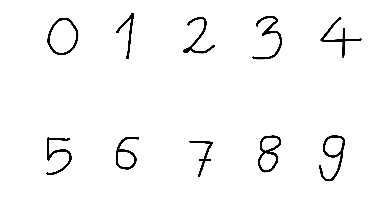

In [127]:
import cv2
# Import test images
# those are images that I drew on SketchIO, feel free to create your own
# Read the code below and try to understand every single line, you will need to apply it later on
ref_images = ["zero.jpeg", "one.jpeg", "two.jpeg", 
              "three.jpeg", "four.jpeg", "five.jpeg", 
              "six.jpeg", "seven.jpeg", "eight.jpeg", "nine.jpeg", ] 
test_img = []
for index, img in enumerate(ref_images):
    image = cv2.imread("test_images/"+img, 0)
    test_img.append(image)
    # print out the result
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

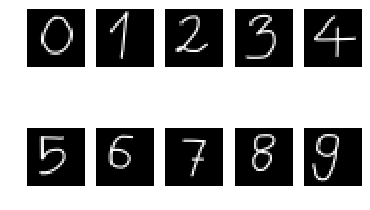

In [128]:
# Resize your images
# First let's define a empty array called 'resized_image' to save your images after changings
# Now go through the test_img and resize them to 28x28 using cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
# You see that your images have a white-background, let's change it to black. Why? Ask your instructor!
# Inside your for-loop, let's plot all the images too to see the results
# Your code here
resize_img = []
for index, image in enumerate(test_img):
    img_resize = cv2.resize(255 - image, (28,28), interpolation=cv2.INTER_AREA)
    resize_img.append(img_resize)
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(img_resize, cmap='gray')

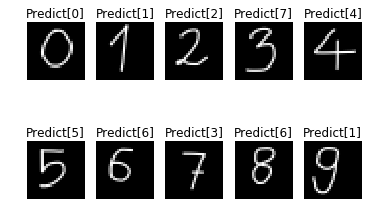

In [129]:
# Apply your model with test images
# Now let's apply our model on the test images
# Remember to transform our image to vector first using reshape(image, (1, -1))
# When you plot the images in your for-loop let's add : plt.title('Predict' + str(prediction))
# so that we can see appropriate prediction of each image
# Your code here
for index, image in enumerate(resize_img):
    # Your code here
    pass

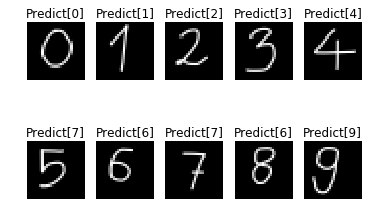

In [148]:
# Apply your model with test images
# Now let's apply our model on the test images
# Remember to extract HOG features from images and transform HOG features to vector first using reshape(image, (1, -1))
# When you plot the images in your for-loop let's add : plt.title('Predict' + str(prediction))
# so that we can see appropriate prediction of each image
# Your code here
for index, image in enumerate(resize_img):
    # Your code here
    pass

### Let fine tune model (HOG, MinMaxScaler, LinearSVC) to get best result.
Try to hack and get **8 correct out of 10**

## Great job!